
### Digits Classification

**KNN (K — Nearest Neighbors)** is one of many (supervised learning) algorithms used in data mining and machine learning, it’s a classifier algorithm where the learning is based “how similar” is a data (a vector) from other 


**How it’s working?**

The KNN is pretty simple, imagine that you have a data about colored balls:

Purple balls;
Yellow balls;

And a ball that you don’t know if it’s purple or yellow, but you has all the data about this color(except the color label).

So, how are you going to know the ball’s color? imagine you like a machine that you only have the ball’s characteristics(data), but doesn’t the final label. Hou do you will to know the ball’s color(final label/your class)?

**Obs:** Let’s suppose that data with number 1(and label R) are referring to the purple balls and the data with number 2 (and label A) are referring to the yellow balls, this’s just to make the explanation easier, in future articles we will work with real data.
Each line refers to a ball and each column refers to a ball’s characteristic, in the last column we have the class (color) of each of the balls:


# The KNN’s steps are:
1. Receive an unclassified data;
2. Measure the distance (Euclidian, Manhattan, Minkowski or Weighted) from the new data to all others data that is already classified;
3. Gets the K(K is a parameter that you difine) smaller distances;
4. Check the list of classes had the shortest distance and count the amount of each class that appears;
5. Takes as correct class the class that appeared the most times;
6. Classifies the new data with the class that you took in step 5;


![](https://lh3.googleusercontent.com/-ADmh7vPIWxA/XTrM4rNblAI/AAAAAAAAgH8/CRNZB7ycYoQFy8O8mvHQqOlXqBJbaaGUACK8BGAs/s0/2019-07-26.png)

In [20]:
from sklearn import datasets, neighbors, linear_model
import matplotlib.pyplot as plt

In [21]:
digits = datasets.load_digits()

In [22]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [23]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

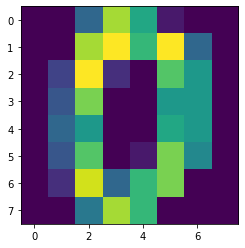

In [24]:
plt.imshow(digits.images[0])

In [25]:
X_digits = digits.data / digits.data.max()
len(X_digits)

1797

In [26]:
X_digits[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [27]:
y_digits = digits.target
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [28]:
n_samples = len(X_digits)
print(int(.9 * n_samples))

1617


In [29]:
X_train = X_digits[:int(.9 * n_samples)]
X_train[1]

array([0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.9375, 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.4375, 0.9375, 1.    , 1.    , 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.625 , 0.    , 0.    ])

In [30]:
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

In [31]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')

In [32]:
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'% logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


In [33]:
knn.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
knn.predict([[0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.9375, 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.4375, 0.9375, 1.    , 1.    , 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.625 , 0.    , 0.   ]])

array([1])

In [39]:
knn.predict_proba([[0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.9375, 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.4375, 0.9375, 1.    , 1.    , 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.625 , 0.    , 0.   ]])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [67]:
logistic.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
New_predicate = knn.predict(X_test)
New_predicate[0:5]

array([5, 2, 8, 0, 1])

In [44]:
knn.score(X_train,y_train)*100

99.01051329622759

In [43]:
knn.score(X_test,New_predicate)*100

100.0